This Program is written to create a model based on Logistic regression which will calculate and predict if the patient will be Diabetic or Not.
0 --> Diabetic
1--> Non-Diabetic

This model will do its predictions studying the features recorded for each patient.
All the Features (Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) are represented as X
while the Outcome is Y

The Dataset is split into 2 parts in 7:3 ratio. Larger chunk of data is passed as an input to model so that model could predict correct result, other part is used as a test data for model.
Accuracy of the model is calculated measuring the difference in ypred(Model-Predicted value whether the patient is diabetic or not) and y-test(known ground truth values if person is actually diabetic or not)
    

In [ ]:
#Importing all the necesarry libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
#Reading the csv
data=pd.read_csv('diabetes.csv')
#fetching first five rows from dataset
data.head()


In [ ]:
#storing valeues of column named 'outcome' in a variable 'outcome_var'
outcome_var=data.Outcome

In [ ]:
#result=data.drop('Outcome', axis=1, inplace=True)
#dropping the colun nmaed 'outcome' from dataset
result=data.drop('Outcome', axis=1) 
data.head()
data

In [ ]:
#splitting and storing train and test data
X_train, X_test, y_train, y_test= train_test_split(result,outcome_var, test_size=0.30, random_state=24)


using Logistic regression to predict Y for given X's

In [ ]:
model=LogisticRegression()

model.fit(X_train, y_train)
#y_pred=model.predict(X_test)
y_pred=model.predict_proba(X_test)[::,1]


displaying the values predicted values(probability) of Y (y_pred)

In [15]:
y_pred

array([0.28686709, 0.28032433, 0.15040064, 0.0833078 , 0.42331624,
       0.15159993, 0.22514543, 0.45943059, 0.43080798, 0.19972611,
       0.06291201, 0.07625432, 0.32731834, 0.10879453, 0.13416605,
       0.18846791, 0.10949796, 0.11531307, 0.14544913, 0.21024713,
       0.19157737, 0.73742979, 0.20896063, 0.10047757, 0.17437814,
       0.64190206, 0.20290846, 0.62918028, 0.0655235 , 0.75844769,
       0.13792649, 0.16920327, 0.18235357, 0.10616165, 0.33725508,
       0.701213  , 0.74297653, 0.59711194, 0.69506582, 0.7096246 ,
       0.3974245 , 0.19822017, 0.16145109, 0.05217937, 0.20218255,
       0.49578174, 0.36749994, 0.4424446 , 0.17730759, 0.03371703,
       0.16213918, 0.75966466, 0.28619901, 0.19573283, 0.07148205,
       0.27129167, 0.10516594, 0.45379052, 0.68165334, 0.84308001,
       0.15244907, 0.44363571, 0.24811109, 0.38776865, 0.34760575,
       0.1065101 , 0.12987979, 0.2339055 , 0.21416555, 0.33866876,
       0.592461  , 0.5358488 , 0.67525734, 0.26708523, 0.01082

In [15]:
#calculating true/false positive/negative using confusion matrix
tn,fp,fn,tp= confusion_matrix(y_test,y_pred).ravel() #ask if the sequence matters

In [16]:
tn,fp,fn,tp

(129, 14, 59, 29)

In [19]:
# precision, recall and f1-score 
print(classification_report(y_test, y_pred)) #Ask nitesh why numbers arent matching

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       143
           1       0.67      0.33      0.44        88

    accuracy                           0.68       231
   macro avg       0.68      0.62      0.61       231
weighted avg       0.68      0.68      0.65       231



calculating fpr and tpr 

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

In [42]:
auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

0.7595359186268278


Plotting ROC curve and AUC 

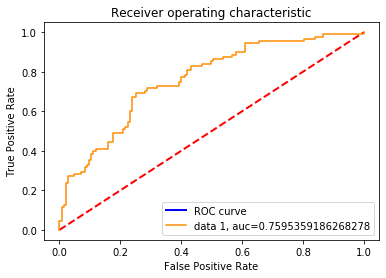

In [58]:
lw = 2
plt.plot(fpr[2], tpr[2], color='blue',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.plot(fpr,tpr,color='darkorange',label="data 1, auc="+str(auc))
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.legend(loc="best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()